In [1]:
!pip install --upgrade pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.4 MB/s eta 0:00:00
   ━━━━━

In [2]:
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

In [6]:
from google.colab import files
file_path = "/content/Fuel_cell_performance_data-Full.csv"
data = pd.read_csv(file_path)

In [7]:
X = data.drop(columns=['Target1','Target2', 'Target3', 'Target4', 'Target5'])
y = data['Target1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)


In [8]:
regression_setup = setup(
    data=train_data,
    target='Target1',
    session_id=42,
    html=False
)

                    Description             Value
0                    Session id                42
1                        Target           Target1
2                   Target type        Regression
3           Original data shape         (700, 16)
4        Transformed data shape         (700, 16)
5   Transformed train set shape         (489, 16)
6    Transformed test set shape         (211, 16)
7              Numeric features                15
8                    Preprocess              True
9               Imputation type            simple
10           Numeric imputation              mean
11       Categorical imputation              mode
12               Fold Generator             KFold
13                  Fold Number                10
14                     CPU Jobs                -1
15                      Use GPU             False
16               Log Experiment             False
17              Experiment Name  reg-default-name
18                          USI              d118


In [9]:
best_model = compare_models()
tuned_model = tune_model(best_model)


required_models = {
    'Linear Regression': 'lr',
    'Support Vector Regression': 'svm',
    'Random Forest Regressor': 'rf',
    'Decision Tree': 'dt',
    'K-Nearest Neighbors': 'knn'
}

saved_models= {}
for title, model_name in required_models.items():
    model = create_model(model_name)
    save_model(model, f"{model_name}_model")
    saved_models[title] = f"{model_name}_model"

save_model(tuned_model, "tuned_best_model")

                                    Model     MAE     MSE    RMSE      R2  \
br                         Bayesian Ridge  0.0505  0.0036  0.0602  0.1852   
ridge                    Ridge Regression  0.0504  0.0036  0.0603  0.1798   
lr                      Linear Regression  0.0504  0.0037  0.0603  0.1790   
lar                Least Angle Regression  0.0504  0.0037  0.0603  0.1790   
et                  Extra Trees Regressor  0.0502  0.0037  0.0606  0.1715   
rf                Random Forest Regressor  0.0506  0.0037  0.0609  0.1638   
ada                    AdaBoost Regressor  0.0514  0.0038  0.0617  0.1419   
gbr           Gradient Boosting Regressor  0.0527  0.0041  0.0636  0.0901   
omp           Orthogonal Matching Pursuit  0.0533  0.0041  0.0642  0.0713   
en                            Elastic Net  0.0533  0.0041  0.0643  0.0710   
lasso                    Lasso Regression  0.0533  0.0041  0.0643  0.0706   
llar         Lasso Least Angle Regression  0.0533  0.0041  0.0643  0.0706   

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0535  0.0041  0.0639  0.0905  0.0348  0.0647
1     0.0556  0.0042  0.0651  0.1211  0.0355  0.0670
2     0.0513  0.0038  0.0619  0.1256  0.0334  0.0598
3     0.0495  0.0034  0.0584  0.2171  0.0316  0.0589
4     0.0549  0.0041  0.0642  0.3212  0.0352  0.0671
5     0.0468  0.0033  0.0573  0.4012  0.0313  0.0562
6     0.0457  0.0030  0.0547  0.1353  0.0299  0.0557
7     0.0518  0.0039  0.0623  0.1615  0.0342  0.0640
8     0.0479  0.0034  0.0583  0.0993  0.0315  0.0562
9     0.0472  0.0032  0.0564  0.1414  0.0311  0.0586
Mean  0.0504  0.0036  0.0603  0.1814  0.0328  0.0608
Std   0.0034  0.0004  0.0035  0.0975  0.0019  0.0043


         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0538  0.0041  0.0644  0.0759  0.0351  0.0651
1     0.0555  0.0043  0.0654  0.1134  0.0357  0.0670
2     0.0515  0.0039  0.0622  0.1162  0.0336  0.0600
3     0.0495  0.0034  0.0583  0.2207  0.0316  0.0589
4     0.0550  0.0041  0.0644  0.3182  0.0353  0.0671
5     0.0466  0.0033  0.0571  0.4050  0.0312  0.0560
6     0.0456  0.0030  0.0546  0.1382  0.0299  0.0556
7     0.0519  0.0039  0.0625  0.1563  0.0343  0.0640
8     0.0479  0.0034  0.0582  0.1019  0.0315  0.0562
9     0.0472  0.0032  0.0563  0.1444  0.0310  0.0586
Mean  0.0504  0.0037  0.0603  0.1790  0.0329  0.0609
Std   0.0034  0.0004  0.0037  0.1002  0.0020  0.0043
Transformation Pipeline and Model Successfully Saved


         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0545  0.0043  0.0657  0.0374  0.0358  0.0661
1     0.0541  0.0042  0.0648  0.1298  0.0353  0.0649
2     0.0569  0.0045  0.0674 -0.0370  0.0363  0.0659
3     0.0513  0.0037  0.0609  0.1502  0.0329  0.0604
4     0.0572  0.0047  0.0688  0.2224  0.0377  0.0698
5     0.0554  0.0046  0.0676  0.1661  0.0369  0.0665
6     0.0464  0.0034  0.0581  0.0245  0.0317  0.0564
7     0.0583  0.0052  0.0724 -0.1303  0.0397  0.0716
8     0.0527  0.0038  0.0619 -0.0162  0.0334  0.0614
9     0.0509  0.0037  0.0607  0.0048  0.0334  0.0626
Mean  0.0538  0.0042  0.0648  0.0552  0.0353  0.0646
Std   0.0034  0.0005  0.0042  0.1033  0.0023  0.0043
Transformation Pipeline and Model Successfully Saved


         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0548  0.0044  0.0661  0.0264  0.0361  0.0665
1     0.0523  0.0040  0.0632  0.1723  0.0344  0.0629
2     0.0492  0.0034  0.0584  0.2197  0.0315  0.0575
3     0.0498  0.0033  0.0577  0.2362  0.0312  0.0591
4     0.0562  0.0042  0.0647  0.3119  0.0354  0.0686
5     0.0501  0.0037  0.0609  0.3234  0.0332  0.0600
6     0.0491  0.0035  0.0596 -0.0263  0.0326  0.0597
7     0.0524  0.0043  0.0654  0.0775  0.0359  0.0650
8     0.0446  0.0032  0.0567  0.1482  0.0306  0.0523
9     0.0480  0.0032  0.0561  0.1489  0.0309  0.0593
Mean  0.0506  0.0037  0.0609  0.1638  0.0332  0.0611
Std   0.0032  0.0004  0.0035  0.1090  0.0020  0.0045
Transformation Pipeline and Model Successfully Saved


         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0802  0.0097  0.0984 -1.1580  0.0537  0.0967
1     0.0627  0.0056  0.0746 -0.1554  0.0407  0.0750
2     0.0664  0.0071  0.0840 -0.6140  0.0456  0.0775
3     0.0586  0.0053  0.0729 -0.2169  0.0396  0.0696
4     0.0695  0.0069  0.0829 -0.1300  0.0454  0.0836
5     0.0753  0.0078  0.0881 -0.4162  0.0479  0.0901
6     0.0640  0.0059  0.0765 -0.6940  0.0420  0.0773
7     0.0676  0.0066  0.0815 -0.4332  0.0446  0.0828
8     0.0691  0.0080  0.0895 -1.1232  0.0484  0.0807
9     0.0639  0.0062  0.0786 -0.6666  0.0429  0.0787
Mean  0.0677  0.0069  0.0827 -0.5607  0.0451  0.0812
Std   0.0060  0.0013  0.0074  0.3479  0.0040  0.0073
Transformation Pipeline and Model Successfully Saved


         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0642  0.0052  0.0724 -0.1669  0.0394  0.0778
1     0.0605  0.0052  0.0722 -0.0824  0.0394  0.0728
2     0.0560  0.0045  0.0673 -0.0342  0.0363  0.0653
3     0.0508  0.0038  0.0613  0.1392  0.0332  0.0602
4     0.0583  0.0047  0.0685  0.2275  0.0375  0.0709
5     0.0582  0.0052  0.0722  0.0486  0.0396  0.0705
6     0.0428  0.0029  0.0543  0.1483  0.0297  0.0524
7     0.0602  0.0058  0.0763 -0.2545  0.0418  0.0749
8     0.0521  0.0038  0.0619 -0.0154  0.0336  0.0614
9     0.0574  0.0048  0.0690 -0.2874  0.0379  0.0702
Mean  0.0561  0.0046  0.0675 -0.0277  0.0368  0.0676
Std   0.0058  0.0008  0.0063  0.1647  0.0035  0.0074
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['F1', 'F2', 'F3', 'F4', 'F5', 'F6',
                                              'F7', 'F8', 'F9', 'F10', 'F11',
                                              'F12', 'F13', 'F14', 'F15'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', BayesianRidge())]),
 'tuned_best_model.pkl')

In [10]:
final_model = finalize_model(tuned_model)

test_data = pd.concat([X_test, y_test], axis=1)

predictions = predict_model(final_model, data=test_data)

predictions.to_csv('predictions.csv', index=False)

            Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Bayesian Ridge  0.0491  0.0035  0.0589  0.2351  0.0322  0.0596


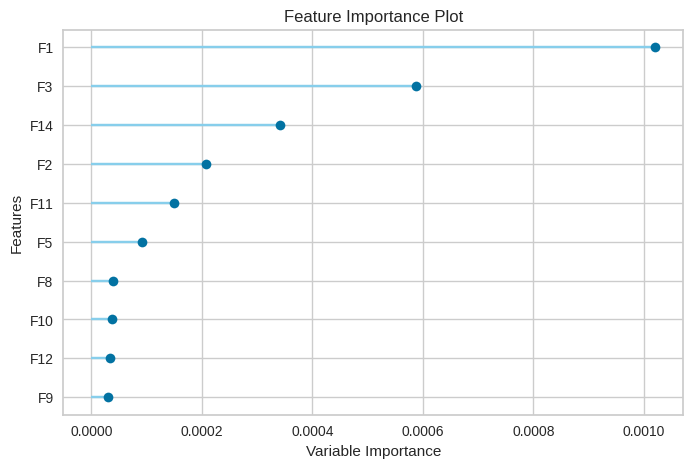

In [11]:
results = pull()
results.to_csv('model_comparison_results.csv', index=False)

plot_model(final_model, plot='feature')

In [12]:
files.download('predictions.csv')
files.download('model_comparison_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Transformation Pipeline and Model Successfully Loaded
            Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Bayesian Ridge  0.0506  0.0035  0.0595  0.2013  0.0325  0.0616


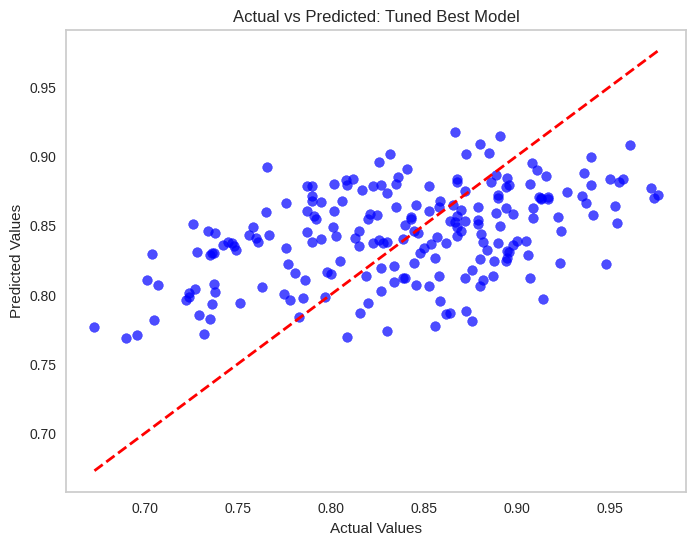

Transformation Pipeline and Model Successfully Loaded
               Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Linear Regression  0.0511  0.0036  0.0602  0.1811  0.0329  0.0622


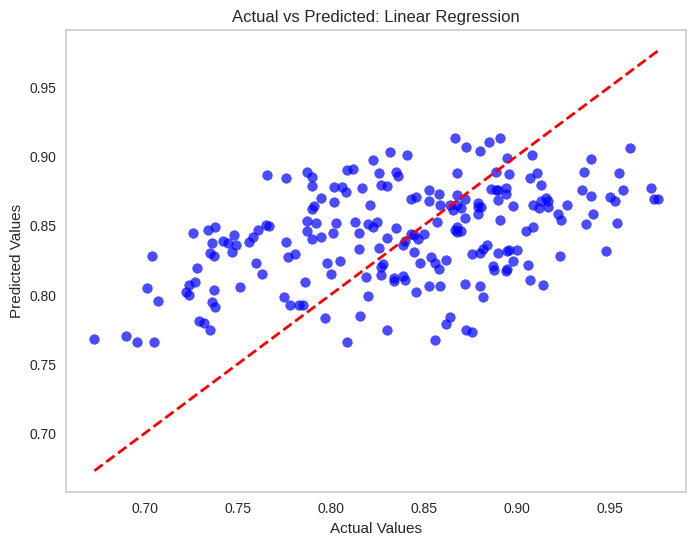

Transformation Pipeline and Model Successfully Loaded
                       Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Support Vector Regression  0.0523  0.0038  0.0617  0.1401  0.0337  0.0633


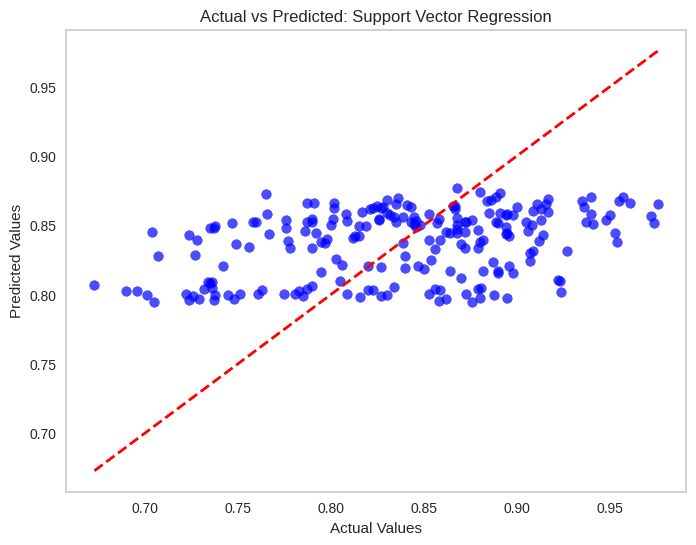

Transformation Pipeline and Model Successfully Loaded
                     Model    MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Random Forest Regressor  0.052  0.0038  0.0617  0.1409  0.0337  0.0633


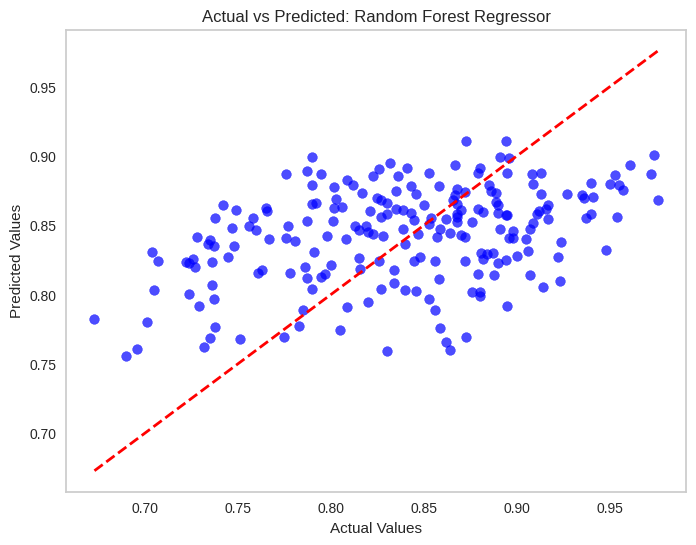

Transformation Pipeline and Model Successfully Loaded
                     Model    MAE    MSE    RMSE      R2   RMSLE    MAPE
0  Decision Tree Regressor  0.071  0.008  0.0893 -0.8007  0.0487  0.0857


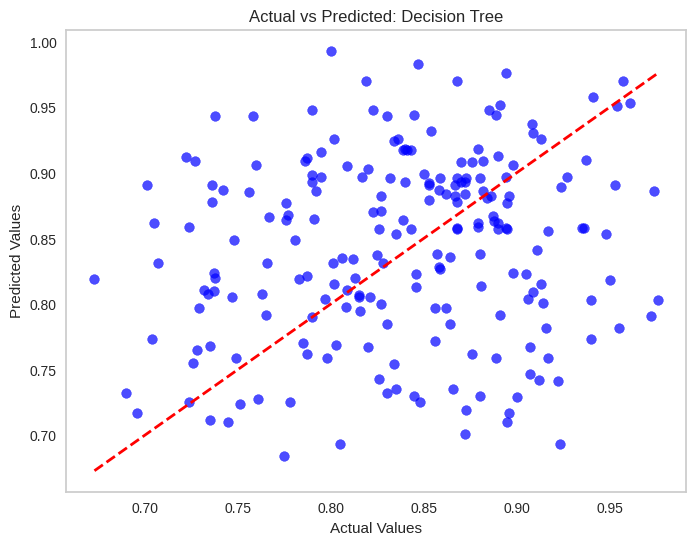

Transformation Pipeline and Model Successfully Loaded
                   Model     MAE     MSE    RMSE     R2   RMSLE    MAPE
0  K Neighbors Regressor  0.0574  0.0049  0.0697 -0.098  0.0381  0.0697


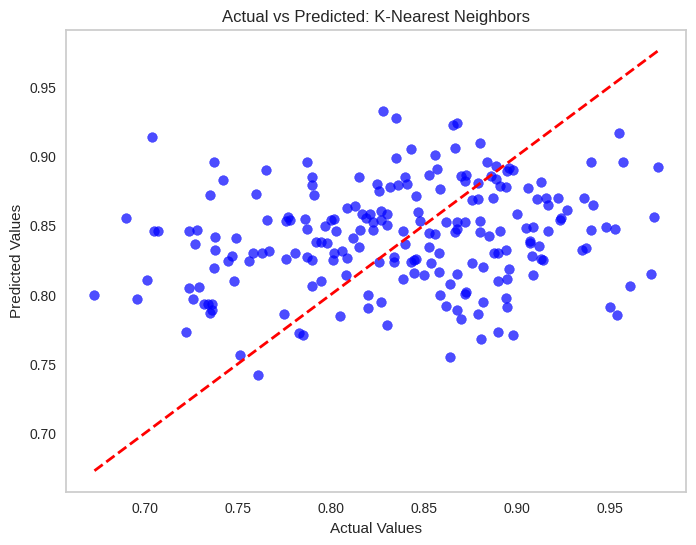

In [13]:
import matplotlib.pyplot as plt
from pycaret.regression import *

def plot_actual_vs_predicted(saved_model_name, model_title):
    model = load_model(saved_model_name)

    predictions = predict_model(model)

    actual_values = predictions['Target1']
    predicted_values = predictions.iloc[:, -1]


    plt.figure(figsize=(8, 6))
    plt.scatter(actual_values, predicted_values, alpha=0.7, color='blue')
    plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f'Actual vs Predicted: {model_title}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid()
    plt.show()

plot_actual_vs_predicted("tuned_best_model", "Tuned Best Model")

for title, model_name in saved_models.items():
    plot_actual_vs_predicted(model_name, title)
`